In [1]:
%load_ext autoreload
%autoreload 2

# 1. Load Dataset

In [2]:
import mlflow
from hcmus.core import appconfig
from hcmus.lbs import LabelStudioConnector
from hcmus.data import LbsDataset
from hcmus.models import FasterRCNNWrapper

/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
2025-03-23 20:33:04.772 | INFO     | hcmus.core.appconfig:<module>:7 - Load DotEnv: True


In [3]:
mlflow.set_tracking_uri(appconfig.MLFLOW_TRACKING_URI)
# mlflow.set_experiment(appconfig.MLFLOW_EXPERIMENT_NAME)
mlflow.set_experiment("Temp2")

<Experiment: artifact_location='mlflow-artifacts:/6', creation_time=1742736770026, experiment_id='6', last_update_time=1742736770026, lifecycle_stage='active', name='Temp2', tags={}>

In [4]:
torch_device = "cpu"
train_connector = LabelStudioConnector(
    url=appconfig.LABEL_STUDIO_URL,
    api_key=appconfig.LABEL_STUDIO_API_KEY,
    project_id=appconfig.LABEL_STUDIO_PROJECT_MAPPING["train"],
)
train_dataset = LbsDataset(train_connector, device=appconfig.TORCH_DEVICE, augmentation=True)

Loading tasks:   4%|▍         | 4/100 [00:05<02:22,  1.49s/it]
2025-03-23 20:33:12.098 | INFO     | hcmus.data._lbs_dataset:__init__:33 - Number of labels: 203
2025-03-23 20:33:12.099 | INFO     | hcmus.data._lbs_dataset:__init__:34 - Number of data points: 1591


In [5]:
train_loader = train_dataset.get_dataloader(shuffle=True, batch_size=1, pin_memory=False)

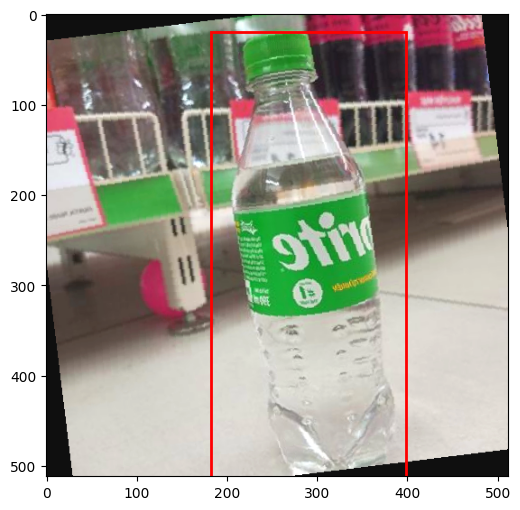

In [6]:
from hcmus.utils import viz_utils
tensor, target = train_dataset[1]
image = train_dataset.tensor_to_image(tensor)
viz_utils.draw_boxes(image, target["boxes"].cpu())

# 2. Finetune Model

In [7]:
model = FasterRCNNWrapper(len(train_dataset._labels), device=torch_device)

2025-03-23 20:33:12.672 | INFO     | hcmus.models._faster_rcnn:__init__:22 - Use torch device: cpu


In [8]:
model.train(train_loader, hyper_params={
    "num_epochs": 1,
    "lr": 1e-5,
    "momentum": 0.9,
    "weight_decay": 1e-6
})

2025-03-23 20:33:14.386 | INFO     | hcmus.models._faster_rcnn:train:58 - Epoch 1/1 - Training loss: 6.1675
2025-03-23 20:33:14.740 | INFO     | hcmus.models._faster_rcnn:train:67 - Save new model at model-0.pth
2025/03/23 20:33:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run charming-auk-824 at: http://jimica.ddns.net:5000/#/experiments/6/runs/b0ed3eb8117d4f10b98f85ad5157dfbb
🧪 View experiment at: http://jimica.ddns.net:5000/#/experiments/6
